In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Tit Coq,1953
1,Grand Old Girl,1935
2,Nemmeno in un sogno,2002
3,Beneath the Skin: Untold Story,2003
4,Sillik,1979


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [35]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year','character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [40]:
s = c.Superman - c.Batman
print('Superman Years:')
print(len(s[s>0.0]))

Superman Years:
11


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [41]:
s = c.Batman - c.Superman
print('Batman years:')
print(len(s[s>0.0]))

Batman years:
26


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

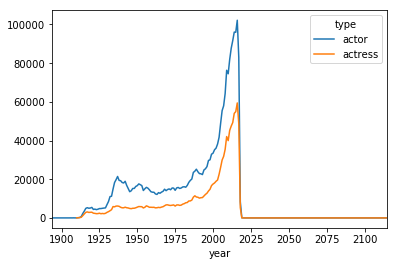

In [56]:
c = cast
c = c.groupby(['year','type']).size()#.plot()
c.unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

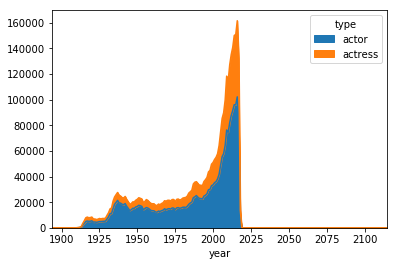

In [57]:
c = cast
c = c.groupby(['year','type']).size()#.plot()
c.unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

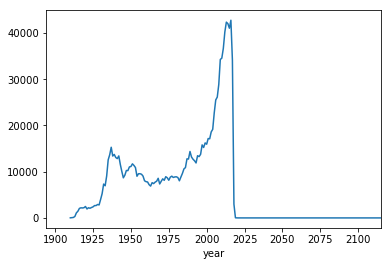

In [61]:
c = cast
c = c.groupby(['year','type']).size()#.plot()
c = c.unstack()#.plot()
d = c.actor - c.actress
d.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

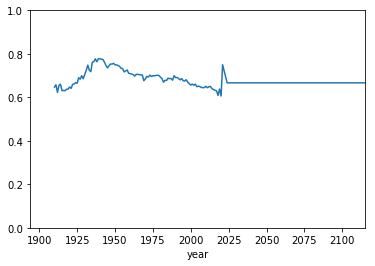

In [64]:
c = cast
c = c.groupby(['year','type']).size()#.plot()
c = c.unstack('type')#.plot()
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

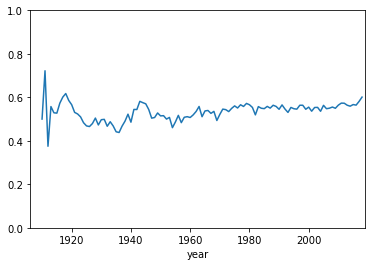

In [68]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year','type']).size()#.plot()
c = c.unstack()
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

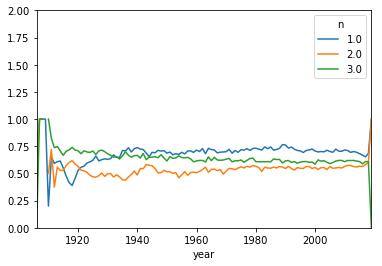

In [79]:
c = cast
c = c[c.n < 4]
c = c.groupby(['year','type', 'n']).size()#.plot()
c = c.unstack('type')
c = c.fillna(0)
p = (c.actor / (c.actor + c.actress))
p = p.unstack('n').plot(ylim=[0,2])

In [9]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
c.groupby(['character']).size()

character
Kermit the Frog     9
Oscar the Grouch    4
dtype: int64

In [10]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
g = c.groupby(['character', c.year // 10 * 10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [15]:
u = g.unstack(0).fillna(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [16]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64